In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm  # Correct import for PyMC


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [99]:
#pip install pymc

  Obtaining dependency information for pymc from https://files.pythonhosted.org/packages/a5/75/a075881e1f2a6e526889147b6662f6d51f19c8ed96a769ada46e6f1e6aec/pymc-5.20.1-py3-none-any.whl.metadata
  Obtaining dependency information for arviz>=0.13.0 from https://files.pythonhosted.org/packages/86/e8/74277b973ecc46d7c30660de441ca4eb3e9e0cc73b9b5e19e85f02ef4952/arviz-0.20.0-py3-none-any.whl.metadata
  Obtaining dependency information for pytensor<2.28,>=2.26.1 from https://files.pythonhosted.org/packages/c9/23/ea402dcfaf1b748cbec33c131ad9b0164b1f3e189c6c0d1bf5d94011f32e/pytensor-2.27.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for h5netcdf>=1.0.2 from https://files.pythonhosted.org/packages/c4/5c/80f84a8ae2c53471792e7f9515df912de454721f0253d1738430ecdb7b04/h5netcdf-1.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for xarray-einstats>=0.3 from https://files.pythonhosted.org/packages/f8/07/27f0d68989bb1c44a781747e222dda67cf65002834ed35ad91abd1a718

  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



In [69]:
df = pd.read_csv('synthetic_travel_1.30.2025.csv')

# Exploring the Data

In [70]:
df.head()

,platform,week of,date,campaign name,ad name,audience,impression,clicks,Net+Agency Spend,Bookings (No VTC),Language
0,Google,04-29-2024,04-30-2024,US|EN|25|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|G...,BeachTime_30s_Vertical,Lookalike_FrequentTravelers,62807.0,748.0,"419,06",55.0,Spanish
1,Meta,02-26-2024,02-27-2024,US|EN|25|E|GUE|Med|GUEBr|CVar|BTL|Soc|SSAU|Met...,IslandBungalow_15s_Square,Lookalike_FrequentTravelers,5440.0,200.0,34.22,11.0,Spanish
2,Google,05-06-2024,05-09-2024,US|EN|24|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|Goo...,IslandBungalow_15s_Square,Lookalike_FrequentTravelers,83959.0,3934.0,821.49,221.0,English
3,meta,03-18-2024,03-21-2024,US|SP|24|E|GUE|Med|GUEBr|CVar|BTL|Soc|SSAU|Met...,WinterWonderland_30s_Vertical,Lookalike_FrequentTravelers,11442.0,406.0,97.69,8.0,French
4,GOOGLE,11-25-2024,11-27-2024,US|SP|2425|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|G...,WinterWonderland_30s_Vertical,Lookalike_FrequentTravelers,94239.0,4657.0,536.00,220.0,Spanish


In [71]:
# View the shape (rows, columns)
df.shape

(30000, 11)

In [72]:
# Get info (column data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   platform           30000 non-null  object 
 1   week of            30000 non-null  object 
 2   date               30000 non-null  object 
 3   campaign name      30000 non-null  object 
 4   ad name            30000 non-null  object 
 5   audience           30000 non-null  object 
 6   impression         29695 non-null  float64
 7   clicks             29737 non-null  float64
 8   Net+Agency Spend   30000 non-null  object 
 9   Bookings (No VTC)  29721 non-null  float64
 10  Language           30000 non-null  object 
dtypes: float64(3), object(8)
memory usage: 2.5+ MB


In [73]:
# See basic descriptive stats for numeric columns
df.describe()


,impression,clicks,Bookings (No VTC)
count,29695.000000,29737.000000,29721.000000
mean,52530.549486,1579.415106,86.688234
std,27418.016037,1069.527031,77.220187
min,5003.000000,51.000000,0.000000
25%,28763.000000,716.000000,29.000000
50%,52374.000000,1345.000000,62.000000
75%,76299.000000,2264.000000,123.000000
max,100000.000000,4965.000000,482.000000


In [74]:
# Count missing values in each column
df.isna().sum()


platform               0
week of                0
date                   0
campaign name          0
ad name                0
audience               0
impression           305
clicks               263
Net+Agency Spend       0
Bookings (No VTC)    279
Language               0
dtype: int64

# Checking Data to Clean

In [75]:
# Replace "NA" or "" with pd.NA (pandas standard for missing)
df = df.replace(["NA", ""], pd.NA)


In [76]:
# Suppose "Language" is the column with inconsistent casing
df["Language"] = df["Language"].str.title()  # "english" -> "English", "SPANISH" -> "Spanish"


In [77]:
# For all object (string) columns:
str_cols = df.select_dtypes(include="object").columns
for col in str_cols:
    df[col] = df[col].astype(str).str.strip()


In [78]:
import re
num_cols = ["impression", "clicks", "Net+Agency Spend", "Bookings (No VTC)"]

for col in num_cols:
    # 1) Remove non-numeric characters (except ".", "-" which might be decimal or sign)
    df[col] = df[col].astype(str).str.replace(r"[^0-9.\-]", "", regex=True)

    # 2) Convert to numeric, invalid => NaN
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [79]:
actual_cols = df.columns
for weird_name in ["impressionz", "impressi0n", "impr_sions"]:
    if weird_name in actual_cols:
        df.rename(columns={weird_name: "impression"}, inplace=True)


In [80]:
df.info()
df.head()
df["Language"].value_counts()
df[["week of", "date"]].head()
df[["impression", "clicks", "Net+Agency Spend"]].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   platform           30000 non-null  object 
 1   week of            30000 non-null  object 
 2   date               30000 non-null  object 
 3   campaign name      30000 non-null  object 
 4   ad name            30000 non-null  object 
 5   audience           30000 non-null  object 
 6   impression         29695 non-null  float64
 7   clicks             29737 non-null  float64
 8   Net+Agency Spend   30000 non-null  float64
 9   Bookings (No VTC)  29721 non-null  float64
 10  Language           30000 non-null  object 
dtypes: float64(4), object(7)
memory usage: 2.5+ MB


,impression,clicks,Net+Agency Spend
count,29695.000000,29737.000000,30000.000000
mean,52530.549486,1579.415106,661.819074
std,27418.016037,1069.527031,3983.170979
min,5003.000000,51.000000,11.150000
25%,28763.000000,716.000000,144.807500
50%,52374.000000,1345.000000,272.400000
75%,76299.000000,2264.000000,458.347500
max,100000.000000,4965.000000,93115.000000


In [81]:
df.to_csv("cleaned_data.csv", index=False)

In [82]:
df.head()

,platform,week of,date,campaign name,ad name,audience,impression,clicks,Net+Agency Spend,Bookings (No VTC),Language
0,Google,04-29-2024,04-30-2024,US|EN|25|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|Goo...,BeachTime_30s_Vertical,Lookalike_FrequentTravelers,62807.0,748.0,41906.00,55.0,Spanish
1,Meta,02-26-2024,02-27-2024,US|EN|25|E|GUE|Med|GUEBr|CVar|BTL|Soc|SSAU|Met...,IslandBungalow_15s_Square,Lookalike_FrequentTravelers,5440.0,200.0,34.22,11.0,Spanish
2,Google,05-06-2024,05-09-2024,US|EN|24|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|Goo...,IslandBungalow_15s_Square,Lookalike_FrequentTravelers,83959.0,3934.0,821.49,221.0,English
3,meta,03-18-2024,03-21-2024,US|SP|24|E|GUE|Med|GUEBr|CVar|BTL|Soc|SSAU|Met...,WinterWonderland_30s_Vertical,Lookalike_FrequentTravelers,11442.0,406.0,97.69,8.0,French
4,GOOGLE,11-25-2024,11-27-2024,US|SP|2425|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|G...,WinterWonderland_30s_Vertical,Lookalike_FrequentTravelers,94239.0,4657.0,536.00,220.0,Spanish


In [83]:
df.columns

Index(['platform', 'week of', 'date', 'campaign name', 'ad name', 'audience',
       'impression', 'clicks', 'Net+Agency Spend', 'Bookings (No VTC)',
       'Language'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   platform           30000 non-null  object 
 1   week of            30000 non-null  object 
 2   date               30000 non-null  object 
 3   campaign name      30000 non-null  object 
 4   ad name            30000 non-null  object 
 5   audience           30000 non-null  object 
 6   impression         29695 non-null  float64
 7   clicks             29737 non-null  float64
 8   Net+Agency Spend   30000 non-null  float64
 9   Bookings (No VTC)  29721 non-null  float64
 10  Language           30000 non-null  object 
dtypes: float64(4), object(7)
memory usage: 2.5+ MB


In [85]:
## Step 3: Create cost per booking
df["cost_per_booking"] = df["Net+Agency Spend"] / df["Bookings (No VTC)"]

# Optional: fill or remove rows where Bookings are 0 or NaN
df = df.replace([np.inf, -np.inf], np.nan)  # if division by zero happened
df.dropna(subset=["cost_per_booking"], inplace=True)  # remove rows with no valid cost/bookings

df["cost_per_booking"].head()


0    761.927273
1      3.110909
2      3.717149
3     12.211250
4      2.436364
Name: cost_per_booking, dtype: float64

In [86]:
df.columns

Index(['platform', 'week of', 'date', 'campaign name', 'ad name', 'audience',
       'impression', 'clicks', 'Net+Agency Spend', 'Bookings (No VTC)',
       'Language', 'cost_per_booking'],
      dtype='object')

In [87]:
df["platform"] = df["platform"].str.lower()

In [88]:
# Select only float columns for aggregation
float_cols = df.select_dtypes(include=['float64']).columns

# Group by 'week of' and 'platform', summing all float columns
df_grouped = df.groupby(["week of", "platform"])[float_cols].sum().unstack(fill_value=0)

# Rename platform-based columns properly
df_grouped.columns = ['_'.join(col).strip() for col in df_grouped.columns]

# Reset index for better readability
df_grouped = df_grouped.reset_index()

print(df_grouped)


       week of  impression_google  impression_meta  impression_snap  \
0   01-01-2024         10339839.0        9728142.0        8748284.0   
1   01-08-2024          8753103.0        9782818.0       10987088.0   
2   01-15-2024          9409551.0        8690421.0        8902525.0   
3   01-22-2024          9730716.0        9972205.0       10490610.0   
4   01-29-2024          9814289.0       11193707.0        9526557.0   
5   02-05-2024         10195782.0        9620968.0        9754356.0   
6   02-12-2024         10658133.0        9615360.0       10877907.0   
7   02-19-2024         10017305.0       10955303.0       10531487.0   
8   02-26-2024         11529294.0       10797583.0        9003197.0   
9   03-04-2024         11412221.0        9589753.0        8567208.0   
10  03-11-2024         10739856.0       10406056.0        9736820.0   
11  03-18-2024          8605448.0       10167933.0        9220693.0   
12  03-25-2024          9545202.0        9294659.0       10015919.0   
13  04

In [89]:

# Rename columns
df_grouped2 = df_grouped.rename(columns={"Net+Agency Spend_google": "google_spend", "Net+Agency Spend_meta": "meta_spend", "Net+Agency Spend_snap": "snap_spend"}).reset_index()

print(df_grouped2)

    index     week of  impression_google  impression_meta  impression_snap  \
0       0  01-01-2024         10339839.0        9728142.0        8748284.0   
1       1  01-08-2024          8753103.0        9782818.0       10987088.0   
2       2  01-15-2024          9409551.0        8690421.0        8902525.0   
3       3  01-22-2024          9730716.0        9972205.0       10490610.0   
4       4  01-29-2024          9814289.0       11193707.0        9526557.0   
5       5  02-05-2024         10195782.0        9620968.0        9754356.0   
6       6  02-12-2024         10658133.0        9615360.0       10877907.0   
7       7  02-19-2024         10017305.0       10955303.0       10531487.0   
8       8  02-26-2024         11529294.0       10797583.0        9003197.0   
9       9  03-04-2024         11412221.0        9589753.0        8567208.0   
10     10  03-11-2024         10739856.0       10406056.0        9736820.0   
11     11  03-18-2024          8605448.0       10167933.0       

In [90]:
df

,platform,week of,date,campaign name,ad name,audience,impression,clicks,Net+Agency Spend,Bookings (No VTC),Language,cost_per_booking
0,google,04-29-2024,04-30-2024,US|EN|25|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|Goo...,BeachTime_30s_Vertical,Lookalike_FrequentTravelers,62807.0,748.0,41906.00,55.0,Spanish,761.927273
1,meta,02-26-2024,02-27-2024,US|EN|25|E|GUE|Med|GUEBr|CVar|BTL|Soc|SSAU|Met...,IslandBungalow_15s_Square,Lookalike_FrequentTravelers,5440.0,200.0,34.22,11.0,Spanish,3.110909
2,google,05-06-2024,05-09-2024,US|EN|24|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|Goo...,IslandBungalow_15s_Square,Lookalike_FrequentTravelers,83959.0,3934.0,821.49,221.0,English,3.717149
3,meta,03-18-2024,03-21-2024,US|SP|24|E|GUE|Med|GUEBr|CVar|BTL|Soc|SSAU|Met...,WinterWonderland_30s_Vertical,Lookalike_FrequentTravelers,11442.0,406.0,97.69,8.0,French,12.211250
4,google,11-25-2024,11-27-2024,US|SP|2425|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|G...,WinterWonderland_30s_Vertical,Lookalike_FrequentTravelers,94239.0,4657.0,536.00,220.0,Spanish,2.436364
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,meta,09-02-2024,09-06-2024,US|EN|24|E|GUE|Med|GUEBr|CVar|BTL|Soc|SSAU|Met...,IslandBungalow_15s_Square,1P_AdventureSeekers,10967.0,156.0,71.27,5.0,French,14.254000
29996,meta,10-28-2024,10-30-2024,US|EN|25|E|GUE|Med|GUEBr|CVar|BTL|Soc|SSAU|Met...,IslandBungalow_15s_Square,1P_HolidayShoppers,31129.0,843.0,191.78,55.0,French,3.486909
29997,google,12-02-2024,12-04-2024,US|EN|25|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|Goo...,ExploreMountains_15s_Landscape,Lookalike_FrequentTravelers,99387.0,4226.0,788.57,366.0,English,2.154563
29998,google,02-05-2024,02-05-2024,US|SP|2425|E|GUE|Med|GUEBr|CGaA|BTL|OLV|SSAU|G...,BeachTime_30s_Vertical,Broad_HomeRentals,NaN,1968.0,147.55,160.0,Spanish,0.922188


# Exploartory Data Analysis

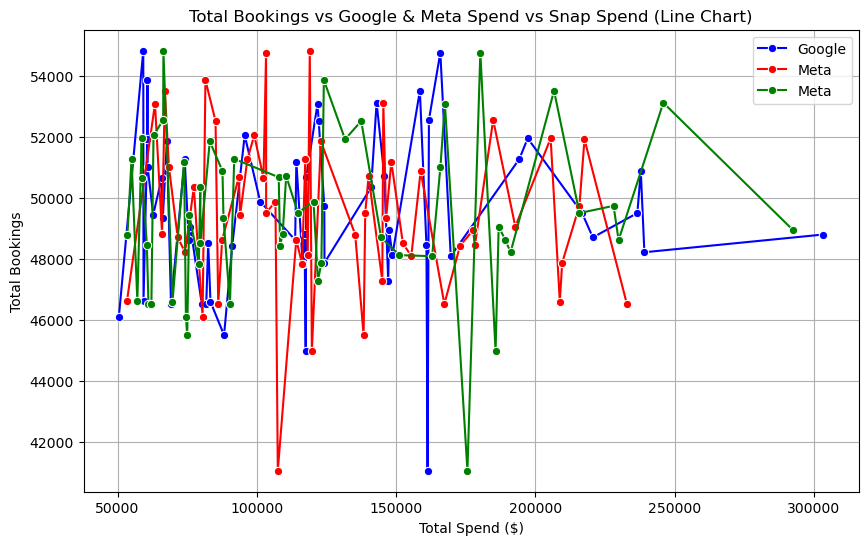

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for total bookings
df_grouped2["total_bookings"] = (
    df_grouped2["Bookings (No VTC)_google"] + 
    df_grouped2["Bookings (No VTC)_meta"] + 
    df_grouped2["Bookings (No VTC)_snap"]
)

# Line plot: Total Bookings vs Google Spend & Meta Spend
plt.figure(figsize=(10, 6))

# Line plot for Google Spend vs Total Bookings
sns.lineplot(data=df_grouped2, x="google_spend", y="total_bookings", label="Google", color="blue", marker="o")

# Line plot for Meta Spend vs Total Bookings
sns.lineplot(data=df_grouped2, x="meta_spend", y="total_bookings", label="Meta", color="red", marker="o")
sns.lineplot(data=df_grouped2, x="snap_spend", y="total_bookings", label="Meta", color="green", marker="o")

plt.xlabel("Total Spend ($)")
plt.ylabel("Total Bookings")
plt.title("Total Bookings vs Google & Meta Spend vs Snap Spend (Line Chart)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [95]:
df_grouped2

,index,week of,impression_google,impression_meta,impression_snap,clicks_google,clicks_meta,clicks_snap,google_spend,meta_spend,snap_spend,Bookings (No VTC)_google,Bookings (No VTC)_meta,Bookings (No VTC)_snap,cost_per_booking_google,cost_per_booking_meta,cost_per_booking_snap,total_bookings
0,0,01-01-2024,10339839.0,9728142.0,8748284.0,332782.0,284113.0,255841.0,303441.25,135331.86,53552.77,18796.0,14752.0,15255.0,2976.301636,3494.285679,1038.476066,48803.0
1,1,01-08-2024,8753103.0,9782818.0,10987088.0,258462.0,294633.0,335699.0,76122.12,192811.05,186848.13,14468.0,15878.0,18715.0,1364.531912,6140.800699,5950.399031,49061.0
2,2,01-15-2024,9409551.0,8690421.0,8902525.0,284276.0,251958.0,266150.0,88241.80,138342.80,75004.93,16620.0,13847.0,15039.0,1915.535740,2069.058239,1427.988652,45506.0
3,3,01-22-2024,9730716.0,9972205.0,10490610.0,289566.0,306283.0,311171.0,75525.56,87560.56,229892.78,16007.0,16680.0,15933.0,2052.632938,1537.261653,2579.439240,48620.0
4,4,01-29-2024,9814289.0,11193707.0,9526557.0,283577.0,345360.0,289474.0,147499.95,177566.95,292661.05,14928.0,18486.0,15522.0,2989.071212,3371.951401,5285.527843,48936.0
5,5,02-05-2024,10195782.0,9620968.0,9754356.0,318484.0,307205.0,297874.0,117756.71,93535.80,107868.57,16667.0,17921.0,16092.0,2235.167666,2177.048046,2288.788007,50680.0
6,6,02-12-2024,10658133.0,9615360.0,10877907.0,326538.0,298622.0,339245.0,60664.80,217649.58,131688.93,17452.0,16759.0,17713.0,1161.567211,2628.452108,1736.756871,51924.0
7,7,02-19-2024,10017305.0,10955303.0,10531487.0,297542.0,340791.0,320970.0,158551.61,66994.01,206719.02,17114.0,19147.0,17253.0,2258.904917,1082.896277,4408.885261,53514.0
8,8,02-26-2024,11529294.0,10797583.0,9003197.0,343514.0,322676.0,267530.0,67711.36,123003.88,83108.06,19936.0,17025.0,14894.0,1339.965013,2139.724395,2139.217132,51855.0
9,9,03-04-2024,11412221.0,9589753.0,8567208.0,327131.0,282580.0,263627.0,66254.68,146443.82,88033.09,18292.0,16073.0,14982.0,1389.071667,6669.523328,1291.461716,49347.0


# Create the Dependent Variable: Cost per Booking

In [ ]:
df.head()

In [103]:
## Step 6: Build a Bayesian Model with PyMC

# 1) Prepare data arrays
y_data = df_grouped2["total_bookings"].values
google_data = df_grouped2["google_spend"].values
meta_data = df_grouped2["meta_spend"].values
snap_data = df_grouped2["snap_spend"].values

with pm.Model() as mmm_model:
    # 2) Define priors for intercept and slopes
    beta_0 = pm.Normal("beta_0", mu=0, sigma=10)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=10)
    beta_2 = pm.Normal("beta_2", mu=0, sigma=10)
    beta_3 = pm.Normal("beta_3", mu=0, sigma=10)

    # 3) Expected value of cost_per_booking
    mu = beta_0 + beta_1 * google_data + beta_2 * meta_data + beta_3 * snap_data

    # 4) Define likelihood (assuming normal residuals)
    sigma = pm.HalfNormal("sigma", sigma=10)
    likelihood = pm.Normal("likelihood", mu=mu, sigma=sigma, observed=y_data)


In [ ]:
## Step 7: Sample from the model
with mmm_model:
    trace = pm.sample(
        draws=2000,      # how many posterior samples
        tune=1000,       # warm-up/burn-in
        target_accept=0.9,  # higher => more robust to complex posteriors
        random_seed=42,  # for reproducibility
    )


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_0, beta_1, beta_2, beta_3, sigma]


Output()

In [ ]:
## Step 8: Posterior Analysis
az.summary(trace, var_names=["beta_0","beta_1","beta_2","beta_3","sigma"])


# New Section

In [63]:
## Step 1: Adstock Function
import numpy as np

def adstock_transform(spend_array, alpha=0.5):
    """
    Applies a simple geometric adstock to a 1D array of spend.
    alpha = decay rate, between 0 and 1.
    Output array has the same length as spend_array.

    adstock[t] = spend[t] + alpha * adstock[t-1]

    If alpha is 0.5, half of last period's adstock carries into current period.
    """
    adstocked = np.zeros_like(spend_array, dtype=float)
    carryover = 0.0
    for t in range(len(spend_array)):
        carryover = spend_array[t] + alpha * carryover
        adstocked[t] = carryover
    return adstocked


In [64]:
## Step 2: Saturation (Hill) Function
def hill_saturation(x_array, hill_a=1.0, hill_b=1.0, hill_c=1.0):
    """
    A simple Hill function (logistic-like) to capture diminishing returns.
    x_array: adstocked spend array.
    hill_a, hill_b, hill_c: shape parameters.

    Common form:
      saturation(x) = hill_a * ( x^hill_b / (hill_c + x^hill_b ) )

    Adjust as needed for your domain.
    """
    x_powered = np.power(x_array, hill_b)
    saturated = hill_a * ( x_powered / (hill_c + x_powered) )
    return saturated


In [ ]:
## Step 3: Transform Google, Meta, Snap spend with Adstock + Saturation
# We'll do it outside the Bayesian model for simplicity,
# using some chosen alpha and hill parameters.

# Example chosen parameters (in a real advanced model, you'd estimate them):
ALPHA_GOOGLE = 0.6
ALPHA_META = 0.5
ALPHA_SNAP = 0.4

HILL_A = 1.0
HILL_B = 1.0
HILL_C = 1.0

# 1) Adstock transform each platform
df_grouped2["adstock_google"] = adstock_transform(df_grouped2["google_spend"].values, alpha=ALPHA_GOOGLE)
df_grouped2["adstock_meta"]   = adstock_transform(df_grouped2["meta_spend"].values,   alpha=ALPHA_META)
df_grouped2["adstock_snap"]   = adstock_transform(df_grouped2["snap_spend"].values,   alpha=ALPHA_SNAP)

# 2) Then apply saturation
df_grouped2["sat_google"] = hill_saturation(df["adstock_google"].values, HILL_A, HILL_B, HILL_C)
df_grouped2["sat_meta"]   = hill_saturation(df["adstock_meta"].values,   HILL_A, HILL_B, HILL_C)
df_grouped2["sat_snap"]   = hill_saturation(df["adstock_snap"].values,   HILL_A, HILL_B, HILL_C)


In [ ]:
## Step 4: Inspect transformations
df_grouped2[["google_spend", "adstock_google", "sat_google"]].head(10)


In [ ]:
## Step 5: Bayesian Regression with PyMC
import pymc as pm
import arviz as az

y_data = df["cost_per_booking"].values

google_sat = df_grouped2["sat_google"].values
meta_sat   = df_grouped2["sat_meta"].values
snap_sat   = df_grouped2["sat_snap"].values

with pm.Model() as mmm_saturation_model:
    # Priors on coefficients
    beta_0 = pm.Normal("beta_0", mu=0, sigma=10)
    beta_google = pm.Normal("beta_google", mu=0, sigma=10)
    beta_meta   = pm.Normal("beta_meta",   mu=0, sigma=10)
    beta_snap   = pm.Normal("beta_snap",   mu=0, sigma=10)

    # We assume the relationship is linear in the saturated variables
    mu = beta_0 + beta_google * google_sat + beta_meta * meta_sat + beta_snap * snap_sat

    # Noise term
    sigma = pm.HalfNormal("sigma", sigma=10)

    # Likelihood
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=y_data)


In [ ]:
## Step 6: MCMC Sampling and Results
with mmm_saturation_model:
    trace = pm.sample(draws=2000, tune=1000, target_accept=0.9, random_seed=42)


In [ ]:
# Summarize posterior
az.summary(trace, var_names=["beta_0", "beta_google", "beta_meta", "beta_snap", "sigma"])